In [1]:
import gedsk

In [2]:
filename = "geqdsks\geqdsk_55799_3.5_301x301"
#filename = "geqdsks/80MW_equilibrium.geqdsk"
data = gedsk.read_gedsk(filename)
psi = gedsk.get_psi(data)

In [3]:
bounds = gedsk.get_bounds(data)
x, y = gedsk.get_xy(data)
spline = gedsk.get_spline_for_psi(psi, x, y)
#all_critical_points = gedsk.find_all_critical_points(spline, bounds, nx=50, ny=50)

In [4]:
#root = gedsk.find_critical_point_using_root(spline, 6, 0, method='hybr')

In [5]:
all_critical_points = gedsk.find_all_critical_points_using_root(spline, bounds,nx=20, ny=20, method='hybr')
all_critical_points

{(2.1786974144429707, 0.7308207686365981),
 (2.1794886126579063, 0.7275258272698925),
 (2.1908855097958524, 0.73046351778307),
 (2.2000823239883736, 0.7352801372516587),
 (2.2151141549765656, -0.6347297045234991),
 (2.4947729654292603, 0.03864420364357058)}

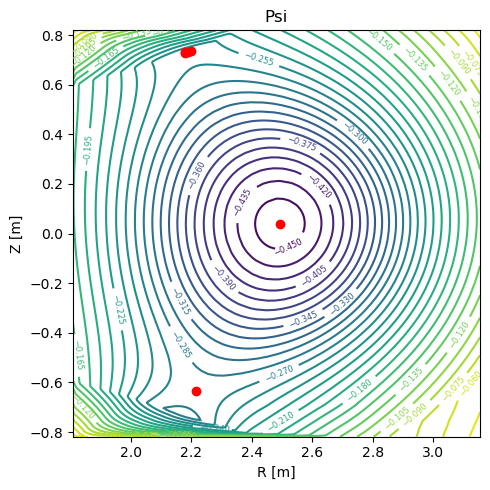

In [6]:
xx, yy = gedsk.get_meshgrid_for_psi(data)
gedsk.plotPoints_on_psi_contour(psi, xx, yy, points=all_critical_points)

In [7]:
# find type of critical point for each point
sorted_points = gedsk.sort_critical_points(all_critical_points, spline, bounds)
sorted_points

{'saddle': [(2.1908855097958524, 0.73046351778307),
  (2.2000823239883736, 0.7352801372516587),
  (2.2151141549765656, -0.6347297045234991),
  (2.1794886126579063, 0.7275258272698925),
  (2.1786974144429707, 0.7308207686365981)],
 'minimum': [(2.4947729654292603, 0.03864420364357058)]}

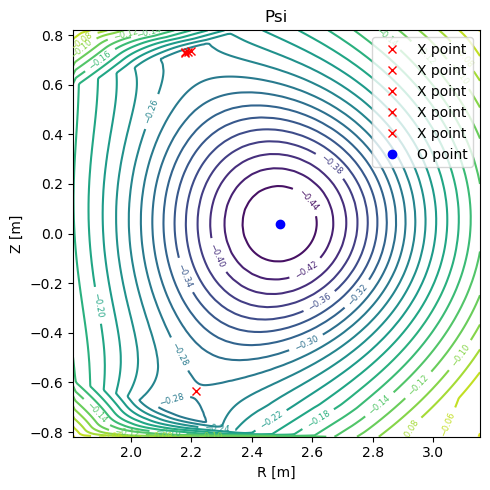

In [8]:
gedsk.plot_sorted_points_with_contour(psi, xx, yy, sorted_points)

In [9]:
# get the value of psi at one x point
x_point = sorted_points['saddle'][2]
x_value = spline(x_point[0], x_point[1])
x_value

array([[-0.2791166]])

In [10]:
# get the another x point
x_point1 = sorted_points['saddle'][1]
x_value1 = spline(x_point1[0], x_point1[1])
x_value1

array([[-0.26641025]])

In [11]:
import matplotlib.pyplot as plt

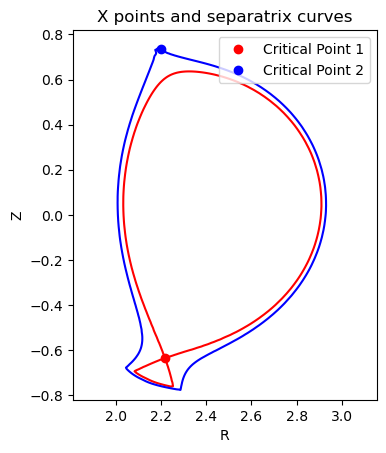

In [12]:
# plot the spline as a contour
fig = plt.figure()
ax = fig.add_subplot(111)
# plot contour using the spline not the psi
contour = ax.contour(x, y, spline(x, y).T, levels=[x_value[0][0], x_value1[0][0], 3, 5], colors=['red','blue'])
ax.contour(x, y, spline(x, y).T, levels=[3, 5], linestyles='dashed')
# plot the critical point x_point
ax.plot(x_point[0], x_point[1], 'o', color='red', label='Critical Point 1')
# plot the critical point x_point1
ax.plot(x_point1[0], x_point1[1], 'o', color='blue', label='Critical Point 2')
ax.set_xlabel('R')
ax.set_ylabel('Z')
ax.legend()
# make the scale equal on both axis
ax.set_aspect('equal')
ax.set_title('X points and separatrix curves')
plt.show()


#### Get the data from the contour plot

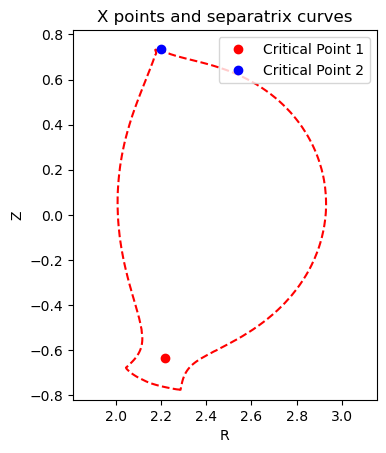

In [13]:
# get the separatrix curve for the first x point

# plot the spline as a contour
fig = plt.figure()
ax = fig.add_subplot(111)
# plot contour using the spline not the psi
contour = ax.contour(x, y, spline(x, y).T, levels=[x_value1[0][0]], colors=['red'])
# plot the critical point x_point
ax.plot(x_point[0], x_point[1], 'o', color='red', label='Critical Point 1')
# plot the critical point x_point1
ax.plot(x_point1[0], x_point1[1], 'o', color='blue', label='Critical Point 2')
ax.set_xlabel('R')
ax.set_ylabel('Z')
ax.legend()

# make the scale equal on both axis
ax.set_aspect('equal')
ax.set_title('X points and separatrix curves')
plt.show()

In [14]:
# get path
p = contour.collections[0].get_paths()[0]
v = p.vertices
x_coords = v[:,0]
y_coords = v[:,1]

C:\Users\fuadh\AppData\Local\Temp\ipykernel_23380\3428490449.py:2: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  p = contour.collections[0].get_paths()[0]


In [15]:
# make pairs of x and y
coorrds = list(zip(x_coords,y_coords))

In [16]:
import pandas as pd

In [17]:
# create a dataframe with the x and y coordinates and export to csv
#sep_data = pd.DataFrame(coorrds, columns=['R', 'Z'])
#sep_data.to_csv('Closed_separatrix.csv', index=False)

In [18]:
len(x)*len(y), len(x), len(y), len(x_coords), len(y_coords)

(90601, 301, 301, 1001, 1001)